<a href="https://colab.research.google.com/github/dheerajreddy3108/Airplane-Detection-using-R-CNN/blob/main/R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/Airplane_data')
os.getcwd()


'/content/gdrive/My Drive/Airplane_data'

In [3]:
path = '/content/gdrive/My Drive/Airplane_data/'
files = os.listdir(path)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
from keras import Model
from keras import optimizers
from keras.layers import Dense
import glob
from random import randint


In [5]:
img_path = '/content/gdrive/My Drive/Airplane_data/Images'
annotations_path = '/content/gdrive/My Drive/Airplane_data/Airplanes_Annotations'


#data visualization


In [6]:
def data_viz(rand_num):
    img_name = 'airplane_'+str(rand_num) +'.jpg'
    img = cv2.imread(os.path.join(img_path,img_name))
    data_frame = pd.read_csv(os.path.join(annotations_path,img_name.replace('.jpg','.csv')))
    plt.imshow(img)
    
    for r in data_frame.iterrows():
        p1 = r[1][0].split(' ')[0]
        q1 = r[1][0].split(' ')[1]
        p2 = r[1][0].split(' ')[2]
        q2 = r[1][0].split(' ')[3]
        
        p1 = int(p1)
        q1 = int(q1)
        p2 = int(p2)
        q2 = int(q2)
        
        img_bb = cv2.rectangle(img,(p1,q1),(p2,q2),(255,255,255),2)
        plt.figure()
        plt.imshow(img_bb)
        
    return img_bb


Random_Image

array([[[151, 165, 164],
        [149, 163, 162],
        [147, 161, 160],
        ...,
        [125, 123, 113],
        [124, 122, 112],
        [124, 122, 112]],

       [[154, 168, 167],
        [152, 166, 165],
        [150, 164, 163],
        ...,
        [126, 124, 114],
        [126, 124, 114],
        [125, 123, 113]],

       [[160, 174, 173],
        [158, 172, 171],
        [156, 170, 169],
        ...,
        [127, 125, 115],
        [127, 125, 115],
        [127, 125, 115]],

       ...,

       [[105, 105,  99],
        [107, 107, 101],
        [110, 110, 104],
        ...,
        [ 93,  94,  84],
        [100, 101,  91],
        [105, 106,  96]],

       [[ 94,  94,  88],
        [ 97,  97,  91],
        [101, 101,  95],
        ...,
        [ 94,  95,  86],
        [100, 101,  92],
        [104, 105,  96]],

       [[ 83,  83,  77],
        [ 86,  86,  80],
        [ 92,  92,  86],
        ...,
        [ 95,  96,  87],
        [101, 102,  93],
        [104, 105,  96]]

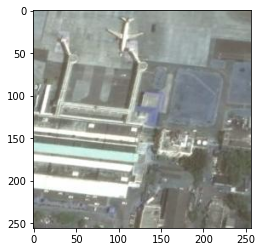

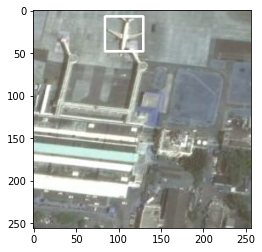

In [7]:
rand_num = randint(1,700)
data_viz(rand_num)


In [8]:

cv2.setUseOptimized(True);
sel_search_seg = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
img1 = cv2.imread(os.path.join(img_path,'42845.jpg'))
sel_search_seg.setBaseImage(img1)
sel_search_seg.switchToSelectiveSearchFast()
rects = sel_search_seg.process()
img_output= img1.copy()
img_out = img1.copy()


0 34 256 166
152 217 62 39
13 167 24 37
0 44 34 61
144 202 95 54
133 145 75 81
27 63 145 116
208 231 33 25
138 231 48 25
0 0 256 193
0 143 139 113
152 216 62 40
117 186 101 70
133 169 29 22
164 161 43 46
232 57 24 20
138 153 118 103
78 127 29 42
137 231 34 25
16 225 48 31
181 171 70 80
0 86 100 70
13 153 25 47
0 0 256 194
28 219 64 37
207 215 49 41
217 8 21 13
175 83 17 13
55 181 58 25
129 202 110 54
159 48 18 13
135 231 36 25
179 162 77 69
15 105 40 29
0 0 256 256
221 83 35 27
18 153 43 24
20 90 10 27
48 111 10 22
84 198 28 39
115 148 17 15
15 105 113 63
0 104 135 103
153 217 61 39
82 208 14 34
0 106 153 150
143 73 23 23
79 125 28 44
154 0 55 26
197 40 17 21
37 0 160 134
79 146 28 21
105 145 76 52
222 83 34 26
20 153 236 103
112 152 19 15
145 152 38 45
159 235 27 21
0 34 76 82
0 196 29 34
10 75 31 42
0 43 152 213
184 166 23 26
0 90 86 66
141 204 98 52
78 147 29 20
217 5 25 15
81 195 19 47
176 152 18 21
22 156 44 40
216 236 25 20
15 67 40 67
46 121 82 47
184 170 20 22
242 197 14 42
0 4

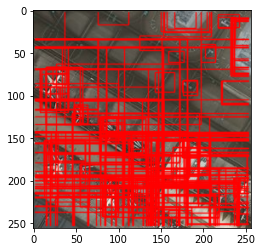

In [9]:

for i,rect in enumerate((rects)):
    x,y,w,h = rect
    print(x,y,w,h)
    
    cv2.rectangle(img_out,(x,y),(x+w,y+h),(255,0,0),1,cv2.LINE_AA)

plt.imshow(img_out)


In [10]:
X_train = []
y_train = []


In [11]:
def IOU(bb1,bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    
    x_left = max(bb1['x1'], bb2['x1'])
    x_right = min(bb1['x1'],bb2['x2'])
    y_bottom = min(bb1['y2'],bb2['y2'])
    y_top = max(bb1['y1'],bb2['y2'])
    
    if x_right < x_left or y_bottom < y_top:
        return 0.
    
    intersect_area = (x_right - x_left)*(y_bottom - y_top)
    bb1_area =  (bb1['x2']- bb1['x1']) * (bb1['y2'] - bb1['y1']) 
    bb2_area =  (bb2['x2']- bb2['x1']) * (bb2['y2'] - bb2['y1']) 
     
    IOU = intersect_area/float(bb1_area + bb2_area - intersect_area)
    assert IOU >=0.
    assert IOU <=1.
    
    return IOU

In [12]:
for e,name in enumerate(os.listdir(annotations_path)):
    if name.startswith('airplane'):
        file_name = name.split('.')[0]+'.jpg'
        print(e,file_name)
        img = cv2.imread(os.path.join(img_path,file_name))
        dataframe = pd.read_csv(os.path.join(annotations_path,name))
        getvalues = []
        for r in dataframe.iterrows():
            x1 = r[1][0].split(' ')[0]
            y1 = r[1][0].split(' ')[1]
            x2 = r[1][0].split(' ')[2]
            y2 = r[1][0].split(' ')[3]
            
            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)
            
            getvalues.append({'x1':x1,'x2':x2,'y1':y1,'y2':y2})
            
        sel_search_seg.setBaseImage(img)
        sel_search_seg.switchToSelectiveSearchFast()
        sel_search_seg_res = sel_search_seg.process()
        
        img_out = img.copy()
        count = 0
        false_count = 0
        flag = 0
        fflag = 0
        bflag = 0
        

0 airplane_074.jpg
1 airplane_077.jpg
2 airplane_078.jpg
3 airplane_090.jpg
4 airplane_073.jpg
5 airplane_072.jpg
6 airplane_094.jpg
7 airplane_067.jpg
8 airplane_075.jpg
9 airplane_087.jpg
10 airplane_091.jpg
11 airplane_051.jpg
12 airplane_076.jpg
13 airplane_095.jpg
14 airplane_081.jpg
15 airplane_089.jpg
16 airplane_059.jpg
17 airplane_062.jpg
18 airplane_084.jpg
19 airplane_079.jpg
20 airplane_092.jpg
21 airplane_086.jpg
22 airplane_054.jpg
23 airplane_083.jpg
24 airplane_088.jpg
25 airplane_065.jpg
26 airplane_080.jpg
27 airplane_070.jpg
28 airplane_085.jpg
29 airplane_082.jpg
30 airplane_093.jpg
31 airplane_057.jpg
32 airplane_006.jpg
33 airplane_014.jpg
37 airplane_022.jpg
39 airplane_001.jpg
42 airplane_043.jpg
43 airplane_033.jpg
45 airplane_046.jpg
48 airplane_035.jpg
49 airplane_003.jpg
50 airplane_027.jpg
53 airplane_038.jpg
55 airplane_017.jpg
59 airplane_011.jpg
60 airplane_049.jpg
65 airplane_009.jpg
66 airplane_025.jpg
68 airplane_019.jpg
70 airplane_030.jpg
76 airplan

In [13]:
for e, res in enumerate(sel_search_seg_res):
    try:
                
        if e < 2000 and flag == 0:
            for gval in getvalues :
                x,y,w,h = res
                iou = IOU(gval,{'x1':x1,'x2':x+w,'y1':y,'y2':y+h})
                    
                if count < 30:
                    if iou > 70:
                        temp_img = img_out[x:x+w,y:y+h]
                        resized = cv2.resize(temp_img,(224,224),interpolation = cv2.INTER_AREA)
                            
                        X_train.append(resized)
                        y_train.append(0)
                        false_count = false_count+1
                    else:
                        fflag = 1
                    if false_count <30:
                        if iou<0.3:
                            temp_img = img_out[x:x+w,y:y+h]
                            resized = cv2.resize(temp_img,(224,224),interpolation= cv2.INTER_AREA)
                            X_train.append(resized)
                            y_train.append(0)
                            false_count = false_count+1
                                
                        else:
                            bflag = 1

                if fflag==1 and bflag ==1:
                        
                    print('in')
                    flag = 1
    except Exception as e:
        print(e)
        continue
    

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)



In [15]:
res_net = tf.keras.applications.resnet50.ResNet50(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
res_net.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [16]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
vgg.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [17]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
for layer in vgg.layers[:-2]:
    layer.trainable = False

x = vgg.get_layer('fc2')
last_out = vgg.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_out)
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics= ['accuracy'])


In [18]:
model.summary()
model.fit(X_train,y_train,batch_size=32,epochs=5,verbose=1,validation_split=0.1,shuffle =True)
 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
svm_imgs = []
svm_labels = []


In [20]:
for e,i in enumerate(os.listdir(annotations_path)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(img_path,filename))
            df = pd.read_csv(os.path.join(annotations_path,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3]) 
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                svm_imgs.append(resized)
                svm_labels.append([0,1])
            sel_search_seg.setBaseImage(image)
            sel_search_seg.switchToSelectiveSearchFast()
            sel_search_seg_res = sel_search_seg.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(sel_search_seg_res):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = IOU(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if falsecounter <5:
                            if iou < 0.3:
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                svm_imgs.append(resized)
                                svm_labels.append([1,0])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue 

0 airplane_074.jpg
1 airplane_077.jpg
2 airplane_078.jpg
3 airplane_090.jpg
4 airplane_073.jpg
5 airplane_072.jpg
6 airplane_094.jpg
7 airplane_067.jpg
8 airplane_075.jpg
9 airplane_087.jpg
10 airplane_091.jpg
11 airplane_051.jpg
12 airplane_076.jpg
13 airplane_095.jpg
14 airplane_081.jpg
15 airplane_089.jpg
16 airplane_059.jpg
17 airplane_062.jpg
18 airplane_084.jpg
19 airplane_079.jpg
20 airplane_092.jpg
21 airplane_086.jpg
22 airplane_054.jpg
23 airplane_083.jpg
24 airplane_088.jpg
25 airplane_065.jpg
26 airplane_080.jpg
27 airplane_070.jpg
28 airplane_085.jpg
29 airplane_082.jpg
30 airplane_093.jpg
31 airplane_057.jpg
32 airplane_006.jpg
33 airplane_014.jpg
37 airplane_022.jpg
39 airplane_001.jpg
42 airplane_043.jpg
43 airplane_033.jpg
45 airplane_046.jpg
48 airplane_035.jpg
49 airplane_003.jpg
50 airplane_027.jpg
53 airplane_038.jpg
55 airplane_017.jpg
59 airplane_011.jpg
60 airplane_049.jpg
65 airplane_009.jpg
66 airplane_025.jpg
68 airplane_019.jpg
70 airplane_030.jpg
76 airplan

In [21]:
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()

    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
hist_final = final_model.fit(np.array(svm_imgs),np.array(svm_labels),batch_size=32,epochs = 25,verbose = 1,shuffle = True,validation_split = 0.1)


Epoch 1/25
159/159 [==============================] - 26s 151ms/step - loss: 9.6850 - accuracy: 0.6241 - val_loss: 1.9510 - val_accuracy: 0.6851
Epoch 2/25
159/159 [==============================] - 24s 152ms/step - loss: 1.1616 - accuracy: 0.7088 - val_loss: 1.0245 - val_accuracy: 0.6797
Epoch 3/25
159/159 [==============================] - 24s 149ms/step - loss: 0.6424 - accuracy: 0.7675 - val_loss: 0.9626 - val_accuracy: 0.6851
Epoch 4/25
159/159 [==============================] - 23s 145ms/step - loss: 0.5462 - accuracy: 0.7786 - val_loss: 0.9054 - val_accuracy: 0.6655
Epoch 5/25
159/159 [==============================] - 23s 147ms/step - loss: 0.4684 - accuracy: 0.8063 - val_loss: 0.8543 - val_accuracy: 0.7082
Epoch 6/25
159/159 [==============================] - 24s 149ms/step - loss: 0.4326 - accuracy: 0.8208 - val_loss: 0.9445 - val_accuracy: 0.6370
Epoch 7/25
159/159 [==============================] - 23s 146ms/step - loss: 0.4130 - accuracy: 0.8266 - val_loss: 0.9972 - val_ac

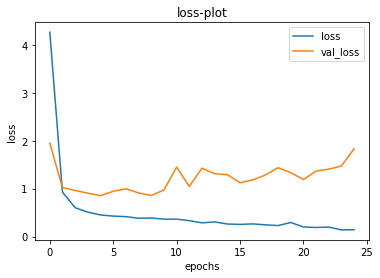

In [24]:

plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title('loss-plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()


Testing the model

In [25]:
img_test = cv2.imread(os.path.join(img_path,'42845.jpg'))
sel_search_seg.setBaseImage(img_test)
sel_search_seg.switchToSelectiveSearchFast()
sel_search_seg_res = sel_search_seg.process()

img_out = img_test.copy()
boxes = []
c = 0

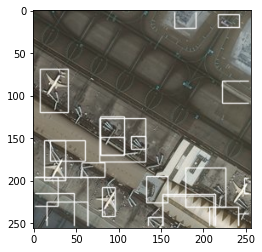

In [27]:
for e,res in enumerate(sel_search_seg_res):
    if e < 50:
        x,y,w,h = res
        temp_img = img_out[x:x+w,y:y+h]
        resize = cv2.resize(temp_img,(224,224),interpolation= cv2.INTER_AREA)
        resize = np.expand_dims(resize,axis=0)
        out = final_model.predict(resize)
        if (out[0][0]<out[0][1]):
            boxes.append([x,y,w,h])
            count = count+1
for box in boxes:
    x,y,w,h = box
    cv2.rectangle(img_out,(x,y),(x+w,y+h),(255,255,255),1,cv2.LINE_AA) 

plt.imshow(img_out)